In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
inner_poll = pd.read_csv('inner_ccg_agg.csv').drop('Unnamed: 0', axis = 1)

In [174]:
outer_poll = pd.read_csv('yearlyOuterCCGgrouped.csv')

In [175]:
outer_poll

,Date,CCG,Nitrogen dioxide,Ozone,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Sulphur dioxide
0,1970-12-31,Hammersmith and Fulham,55.535033,35.326590,26.728551,14.253794,6.884052
1,1970-12-31,Oxford,49.439685,40.724350,22.168788,NaN,NaN
2,1970-12-31,Reading,42.101185,NaN,25.088359,NaN,NaN
3,1970-12-31,Watford,36.275607,39.028515,20.402955,9.252213,NaN


In [84]:
flights = pd.read_csv('../cleaned_flight_data.csv')

In [85]:
flights = flights.rename(columns = {'Unnamed: 0': 'Date'})
flights['Date'] = pd.to_datetime(flights['Date'], format='%Y')
flights['Date'] = [str(x)[:4] for x in flights['Date']]
flights.head()

,Date,number of flights
0,1989,347000.0
1,1990,368000.0
2,1991,362000.0
3,1992,388000.0
4,1993,396000.0


In [86]:
flights = flights[~(flights['Date'] < '2004')]

In [87]:
f = flights.set_index('Date')

In [31]:
inner_poll.head()

,CCG,Date,Pollutant,Indicator Value (R µg/m3)
0,Ealing,2004-12-31,Carbon monoxide,0.770049
1,Ealing,2004-12-31,Nitric Oxide,NaN
2,Ealing,2004-12-31,Nitrogen dioxide,57.882938
3,Ealing,2004-12-31,Oxides of Nitrogen,NaN
4,Ealing,2004-12-31,Ozone,33.992080


In [98]:
inner_poll['Date'] = [str(x)[:4] for x in inner_poll['Date']]
inner_poll

,CCG,Date,Pollutant,Indicator Value (R µg/m3)
0,Ealing,2004,Carbon monoxide,0.770049
1,Ealing,2004,Nitric Oxide,NaN
2,Ealing,2004,Nitrogen dioxide,57.882938
3,Ealing,2004,Oxides of Nitrogen,NaN
4,Ealing,2004,Ozone,33.992080
...,...,...,...,...
913,Surrey Heartlands,2020,Ozone,NaN
914,Surrey Heartlands,2020,PM10 Particulate matter,NaN
915,Surrey Heartlands,2020,PM10 particulate matter (Hourly measured),13.867397
916,Surrey Heartlands,2020,PM2.5 particulate matter (Hourly measured),7.923797


In [123]:
close_to_heathrow = ['Hillingdon', 'Hounslow']
inner_poll = inner_poll[inner_poll['CCG'].isin(close_to_heathrow)]

In [124]:
p = inner_poll.groupby(['Date','Pollutant']).mean().reset_index().set_index('Date')
p.head()

,Pollutant,Indicator Value (R µg/m3)
Date,,
2004,Carbon monoxide,0.817403
2004,Nitric Oxide,50.485423
2004,Nitrogen dioxide,50.847594
2004,Oxides of Nitrogen,134.377965
2004,Ozone,31.628426


In [125]:
flight_pollution = pd.merge(p,f,on='Date', how ='inner').reset_index()
flight_pollution.head()

,Date,Pollutant,Indicator Value (R µg/m3),number of flights
0,2004,Carbon monoxide,0.817403,469786.0
1,2004,Nitric Oxide,50.485423,469786.0
2,2004,Nitrogen dioxide,50.847594,469786.0
3,2004,Oxides of Nitrogen,134.377965,469786.0
4,2004,Ozone,31.628426,469786.0


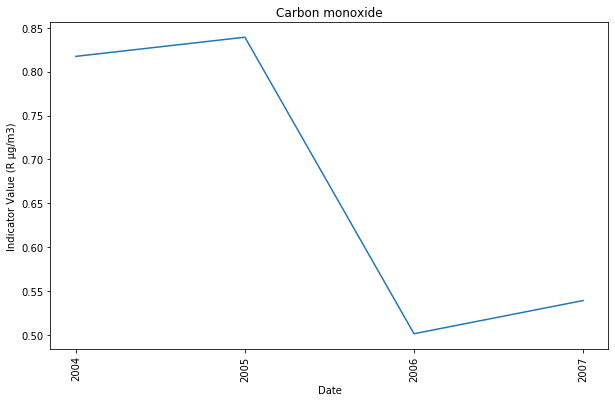

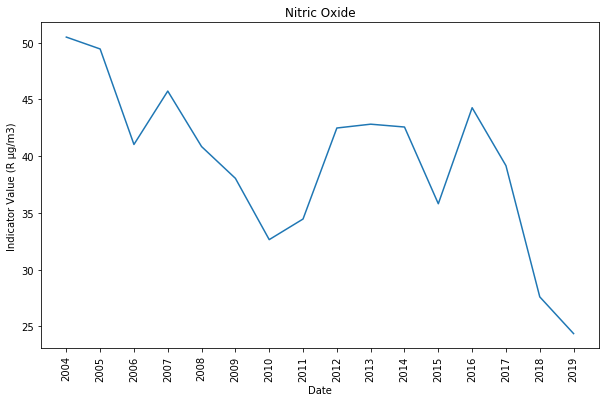

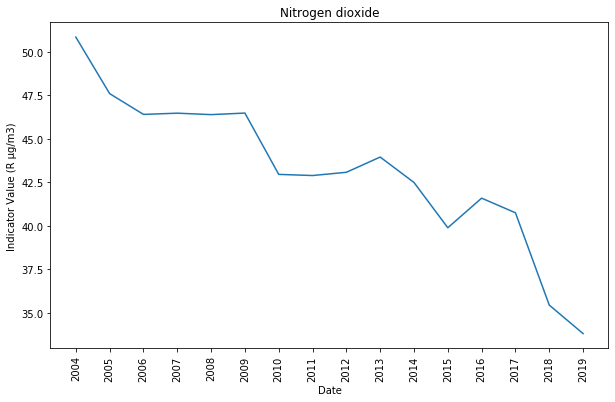

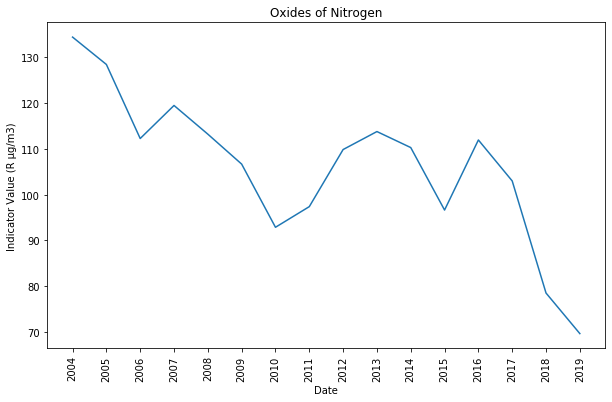

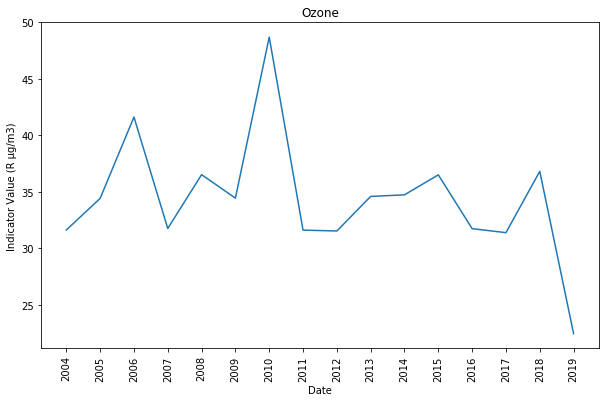

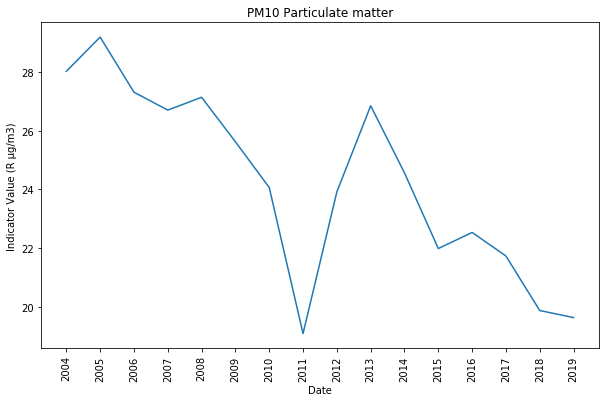

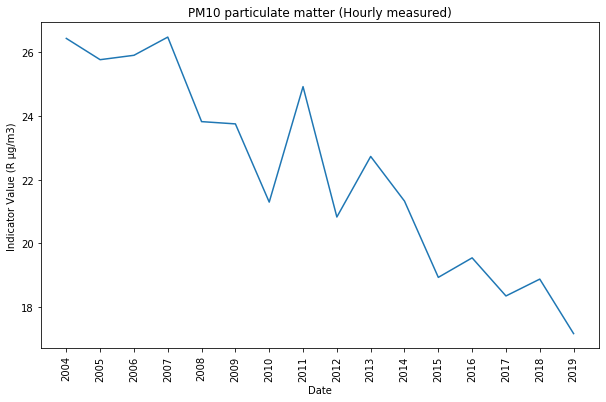

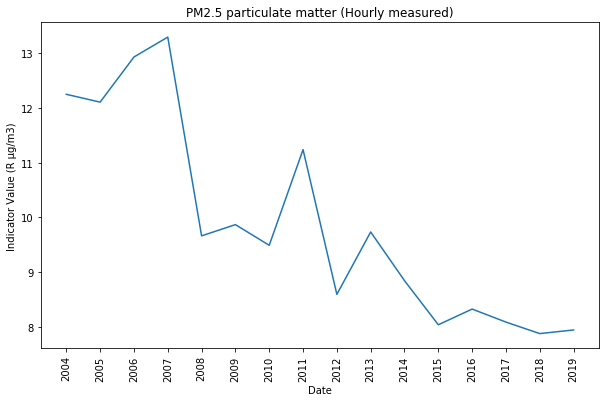

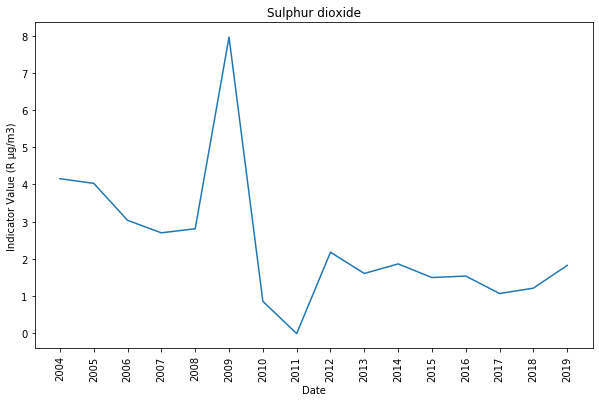

In [138]:
for poll in flight_pollution['Pollutant'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(y = 'Indicator Value (R µg/m3)',
                 x ='Date',
                 data = flight_pollution[flight_pollution['Pollutant'] == poll]).set_title(poll)

    plt.xticks(rotation=90)
    plt.show()

In [163]:
mock = flight_pollution[flight_pollution['Pollutant'] == 'Ozone']